<a href="https://colab.research.google.com/github/SnehhaPadmanabhan/Bertelsmann-AI-Challenge/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2019-12-17 16:50:16--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   2.75K  --.-KB/s    in 0s      

2019-12-17 16:50:16 (75.0 MB/s) - ‘helper.py’ saved [2813/2813]



In [2]:
import torch
from torch import nn
import helper
import torch.nn.functional as F
from torchvision import datasets, transforms
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

  0%|          | 16384/26421880 [00:00<02:43, 161132.15it/s]

26427392it [00:00, 75020907.39it/s]                            


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


32768it [00:00, 447826.84it/s]
  2%|▏         | 98304/4422102 [00:00<00:04, 966890.37it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


4423680it [00:00, 23212321.75it/s]                         
8192it [00:00, 158126.30it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw
Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw
Processing...
Done!


In [3]:
#training
from torch import optim
model = nn.Sequential(
    nn.Linear(784,256),
    nn.ReLU(),
    nn.Linear(256,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10), 
    nn.LogSoftmax(dim=1)
)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 7
for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    images = images.view(images.shape[0],-1)
    optimizer.zero_grad()
    output = model(images)
    loss = criterion(output,labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  else:
    print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 2.1473588102153625
Training loss: 1.3040474048301356
Training loss: 0.8325133900652563
Training loss: 0.6847410951214813
Training loss: 0.6177662827376363
Training loss: 0.5745645521292045
Training loss: 0.5431159645128352


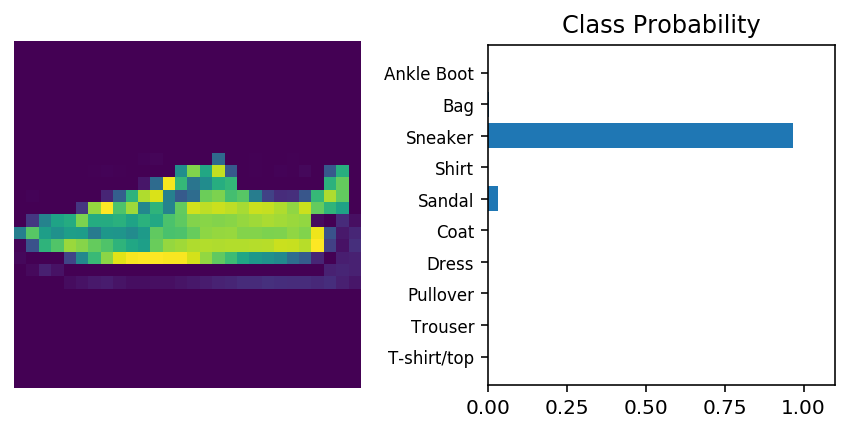

In [4]:
#testing
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import helper
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]
img = img.view(img.shape[0],-1)
ps = torch.exp(model(img))
helper.view_classify(img, ps, version='Fashion')